In [1]:
 #load package
using Revise
using Plots
using LaTeXStrings
using LinearAlgebra
using SparseIR
using Nevanlinna

In [2]:
# Set work data Type
T = BigFloat
setprecision(2048)

2048

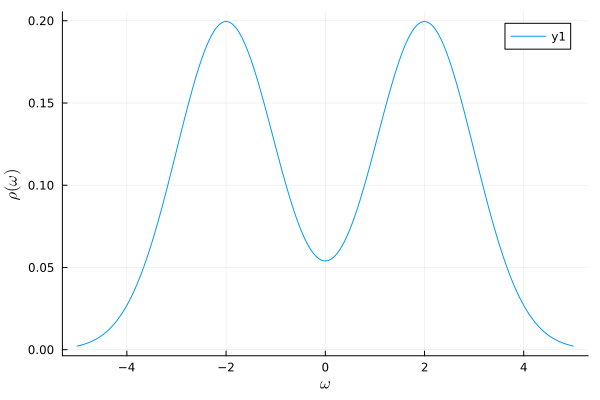

In [3]:
 #define spectral function
gaussian(x, mu, sigma) = exp(-0.5*((x-mu)/sigma)^2)/(sqrt(2*π)*sigma)
#rho(omega) = gaussian(omega, 0.0, 1.0)
rho(omega) = 0.5*gaussian(omega, 2.0, 1.0) + 0.5*gaussian(omega, -2.0, 1.0)
omegas = LinRange(-5, 5, 1000)
plot()
plot!(omegas, rho.(omegas), xlabel=latexstring("\\omega"), ylabel=latexstring("\\rho(\\omega)"))

In [4]:
function generate_input_data(rho::Function, beta::Float64)
    lambda = 1e+4
    wmax = lambda/beta
    basis = FiniteTempBasisSet(beta, wmax, 1e-15)

    rhol = [overlap(basis.basis_f.v[l], rho) for l in 1:length(basis.basis_f)]
    gl = - basis.basis_f.s .* rhol
    gw = evaluate(basis.smpl_wn_f, gl)
    
    hnw = length(basis.smpl_wn_f.sampling_points)÷2
    
    input_smpl = Array{Complex{T}}(undef, hnw) 
    input_gw   = Array{Complex{T}}(undef, hnw) 
    
    for i in 1:hnw
        input_smpl[i]= SparseIR.valueim(basis.smpl_wn_f.sampling_points[hnw+i], beta)
        input_gw[i]  = gw[hnw+i]
    end
    
    return input_smpl, input_gw
end

generate_input_data (generic function with 1 method)

In [5]:
beta = 100. #inverse temperature
input_smpl, input_gw = generate_input_data(rho, beta)
;

In [6]:
N_real    = 1000  #demension of array of output
omega_max = 10.0  #energy cutoff of real axis
eta       = 0.001 #broaden parameter 
sum_rule  = 1.0   #sum rule
H_max     = 50    #cutoff of Hardy basis
lambda    = 1e-4  #regularization parameter
iter_tol  = 1000  #upper bound of iteration
;

In [7]:
#moments = Complex{T}.([1, 0, 1, 0, 3, 0, 15, 0, 105, 0, 945])
#moments = Complex{T}.([1, 0, 1])
#moments = Complex{T}.([1])

#moments = Complex{T}.([1, 0, 5, 0, 43, 0, 499, 0, 7193, 0, 123109, 0, 2430355, 0, 54229907])
moments = Complex{T}.([1, 0, 5, 0, 43])

5-element Vector{Complex{BigFloat}}:
  1.0 + 0.0im
  0.0 + 0.0im
  5.0 + 0.0im
  0.0 + 0.0im
 43.0 + 0.0im

In [8]:
wo_ham_nev_sol = Nevanlinna.HamburgerNevanlinnaSolver(moments, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

Rank of Hankel matrix:3
Non-degenerate
Postive semi-definite
Non-singular
Positive definite
Proper
N_imag is setted as 30


In [9]:
ham_nev_sol = Nevanlinna.HamburgerNevanlinnaSolver(moments, input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=true)
;

Rank of Hankel matrix:3
Non-degenerate
Postive semi-definite
Non-singular
Positive definite
Proper
N_imag is setted as 30
H=1
Iter     Function value   Gradient norm 
     0     5.822660e-01     1.734370e+00
 * time: 0.013603925704956055
     1     3.896799e-01     9.749887e-01
 * time: 1.647094964981079
     2     3.481959e-01     7.155324e-01
 * time: 2.2692580223083496
     3     2.574300e-01     1.715028e-01
 * time: 3.1901910305023193
     4     2.519761e-01     4.216214e-02
 * time: 4.09937310218811
     5     2.518439e-01     7.430777e-04
 * time: 5.030255079269409
     6     2.518438e-01     1.555046e-04
 * time: 5.651997089385986
     7     2.518438e-01     3.589196e-05
 * time: 6.304086923599243
     8     2.518438e-01     2.165771e-05
 * time: 7.269984006881714
     9     2.518438e-01     3.279631e-06
 * time: 7.90662407875061
    10     2.518438e-01     1.250200e-06
 * time: 8.547564029693604
    11     2.518438e-01     2.992597e-07
 * time: 9.524616003036499
    12     2.5

Nevanlinna.HamburgerNevanlinnaSolver{BigFloat}(Complex{BigFloat}[1.0 + 0.0im, 0.0 + 0.0im, 5.0 + 0.0im, 0.0 + 0.0im, 43.0 + 0.0im], 5, 3, 3, 3, true, false, true, false, Complex{BigFloat}[0.277777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777777759 - 0.0im, -8.60000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000

In [10]:
Nevanlinna.solve!(ham_nev_sol)

H=1
Iter     Function value   Gradient norm 
     0     2.518438e-01     5.216471e-09
 * time: 0.00017905235290527344
max_theta=0.208372380510642912923352310523375502500183911239657542554088857761913884278842186123601999808241157623552101191844506729840881317703749521469422976931205987594948463035657554538982643475360119933862544702119206785147588800174886107759206756074830648517577617415574086251366596686469343771592904178394408673181351280562544961414821342660447409403316727141645662685824829585795352885935912940554490322649051467855236083315368864698787548782698143589861290854951495255521870277298123706981395207279504504683472030274602099817881780802870865424692721268208316965900774289514583748342754032637661480978052016945902098140319
hardy optimization was success.
H=2
Iter     Function value   Gradient norm 
     0     2.518438e-01     1.159283e+00
 * time: 0.0001819133758544922
     1     1.672955e-01     6.039425e-01
 * time: 0.9283740520477295
     2     8.946214e-02     2.413

max_theta=0.404436869076131279211104054017226137739741188492645801297087024880242374962057468937073172067938218073304448003239893169609887705499201987941668059352015882518856479987050069412001510992909983909476073072543271679565474981059978184028425950494503156857793895071224454108149697724894596592631534119034412342468538307477864788865264254915474791591184221912357899722235776692658368213403502269425285442129081938317506086923209149737736001969704437730780815683377410409100728126020163516943203734248200219210778890307889392729809952164675040203246546038089142675099753048597675979844987244284255025496422146199711262040609
hardy optimization was success.
H=6
Iter     Function value   Gradient norm 
     0     2.576100e-03     4.996468e-02
 * time: 0.0001709461212158203
     1     2.333975e-03     4.447173e-02
 * time: 0.7262589931488037
     2     2.162743e-03     2.526355e-02
 * time: 1.4590489864349365
     3     1.986437e-03     2.630550e-02
 * time: 2.1848678588867188
     4     1.

    29     1.260658e-04     2.967822e-06
 * time: 33.15723419189453
    30     1.260658e-04     1.313770e-06
 * time: 33.988179206848145
    31     1.260658e-04     5.967920e-07
 * time: 34.78393006324768
    32     1.260658e-04     2.225987e-07
 * time: 35.62655019760132
    33     1.260658e-04     9.296317e-08
 * time: 36.46810007095337
    34     1.260658e-04     4.334882e-08
 * time: 37.36355710029602
    35     1.260658e-04     1.611219e-08
 * time: 38.230263233184814
    36     1.260658e-04     6.303985e-09
 * time: 39.08290505409241
max_theta=0.4591734985179070168895153422252853837247317046818800796573970518629578690444778308657583835868135827612396577841460318294218599413451626564733883906660290616693262527679300805697188008107812929814770496210400106309190169783710490458823131689313745479876386292442309806663974228411090192426879531151554337352960983593060492582471000864463374445445551528615520618107989800586710294038730593405548542452039155580605293686881629285695369586619914

    42     2.897776e-05     7.501783e-04
 * time: 51.65507507324219
    43     2.894527e-05     9.278942e-04
 * time: 53.069983959198
    44     2.888945e-05     1.154582e-03
 * time: 54.48584508895874
    45     2.880673e-05     1.323750e-03
 * time: 56.33459711074829
    46     2.866042e-05     1.330677e-03
 * time: 57.623111963272095
    47     2.843064e-05     7.317498e-04
 * time: 58.9316189289093
    48     2.831845e-05     3.948548e-04
 * time: 60.187366008758545
    49     2.830668e-05     6.900669e-05
 * time: 61.04984903335571
    50     2.830591e-05     3.429392e-05
 * time: 62.34411311149597
    51     2.830579e-05     1.803547e-05
 * time: 63.26130700111389
    52     2.830575e-05     6.869208e-06
 * time: 64.5310730934143
    53     2.830575e-05     3.206353e-06
 * time: 65.38192200660706
    54     2.830574e-05     1.752248e-06
 * time: 66.69450211524963
    55     2.830574e-05     7.832903e-07
 * time: 67.53096199035645
    56     2.830574e-05     3.451820e-07
 * time: 

    13     1.708432e-05     3.316904e-04
 * time: 13.79412293434143
    14     1.700027e-05     2.568755e-04
 * time: 15.176930904388428
    15     1.684959e-05     2.723545e-04
 * time: 16.568469047546387
    16     1.675252e-05     1.900946e-04
 * time: 17.971621990203857
    17     1.664858e-05     3.075661e-04
 * time: 19.358240842819214
    18     1.662674e-05     1.846597e-04
 * time: 20.302186965942383
    19     1.661820e-05     1.904366e-04
 * time: 21.72140884399414
    20     1.660768e-05     1.775525e-04
 * time: 23.13210105895996
    21     1.659920e-05     2.213890e-04
 * time: 25.04578185081482
    22     1.659112e-05     1.779373e-04
 * time: 26.431489944458008
    23     1.657973e-05     2.111237e-04
 * time: 27.815062046051025
    24     1.656100e-05     1.926518e-04
 * time: 29.166040897369385
    25     1.652049e-05     3.338453e-04
 * time: 30.549840927124023
    26     1.650485e-05     3.680757e-04
 * time: 31.4446280002594
    27     1.642744e-05     6.676337e-04

    29     1.364999e-05     9.350348e-05
 * time: 35.93169021606445
    30     1.357095e-05     4.979031e-04
 * time: 37.87676119804382
    31     1.351536e-05     5.611833e-04
 * time: 39.33456301689148
    32     1.347512e-05     5.905154e-04
 * time: 40.79885911941528
    33     1.340851e-05     4.622057e-04
 * time: 42.19509506225586
    34     1.336701e-05     2.486590e-04
 * time: 43.629332065582275
    35     1.335092e-05     2.183150e-04
 * time: 45.02117300033569
    36     1.334683e-05     4.091023e-05
 * time: 45.954896211624146
    37     1.334433e-05     4.602728e-05
 * time: 47.38083100318909
    38     1.334258e-05     8.740750e-05
 * time: 48.77155804634094
    39     1.333921e-05     1.057952e-04
 * time: 50.248552083969116
    40     1.332275e-05     3.117449e-04
 * time: 52.18763518333435
    41     1.327232e-05     7.100673e-04
 * time: 53.69799208641052
    42     1.320022e-05     6.853564e-04
 * time: 55.16793417930603
    43     1.313616e-05     8.193555e-04
 * t

    33     1.253719e-05     1.716892e-05
 * time: 45.00172710418701
    34     1.253699e-05     2.597546e-05
 * time: 46.71205019950867
    35     1.253682e-05     2.912920e-05
 * time: 49.065110206604004
    36     1.253646e-05     4.508832e-05
 * time: 50.61167502403259
    37     1.253579e-05     7.041439e-05
 * time: 52.13927602767944
    38     1.253411e-05     1.024253e-04
 * time: 53.676918029785156
    39     1.253146e-05     1.441531e-04
 * time: 55.158313035964966
    40     1.252590e-05     2.249029e-04
 * time: 56.64050507545471
    41     1.251869e-05     2.748220e-04
 * time: 58.138763189315796
    42     1.250911e-05     3.416870e-04
 * time: 59.64952802658081
    43     1.250105e-05     3.733083e-04
 * time: 61.110711097717285
    44     1.249283e-05     4.042835e-04
 * time: 62.6050751209259
    45     1.248060e-05     3.942978e-04
 * time: 64.15815711021423
    46     1.244164e-05     2.481822e-04
 * time: 66.35155320167542
    47     1.243556e-05     8.369472e-05
 * 

     3     1.217868e-05     1.533908e-04
 * time: 3.626944065093994
     4     1.217688e-05     1.191038e-04
 * time: 4.728682994842529
     5     1.217440e-05     1.124099e-04
 * time: 5.788733005523682
     6     1.217197e-05     1.124524e-04
 * time: 6.949132919311523
     7     1.216910e-05     1.366796e-04
 * time: 8.190315961837769
     8     1.216546e-05     1.131181e-04
 * time: 9.53472089767456
     9     1.216171e-05     1.389019e-04
 * time: 11.032217025756836
    10     1.215796e-05     1.033121e-04
 * time: 12.247352838516235
    11     1.215369e-05     1.000289e-04
 * time: 13.519476890563965
    12     1.214974e-05     7.925407e-05
 * time: 14.78915786743164
    13     1.214552e-05     6.618285e-05
 * time: 16.00960397720337
    14     1.214177e-05     4.862940e-05
 * time: 17.256042003631592
    15     1.213883e-05     3.960939e-05
 * time: 18.484978914260864
    16     1.213587e-05     4.064157e-05
 * time: 20.480762004852295
    17     1.213395e-05     3.366227e-05
 *

   123     1.195745e-05     1.885418e-05
 * time: 191.56637907028198
   124     1.195743e-05     2.524545e-05
 * time: 193.3378610610962
   125     1.195741e-05     2.546962e-05
 * time: 194.5700969696045
   126     1.195738e-05     3.394991e-05
 * time: 196.3700180053711
   127     1.195735e-05     3.423753e-05
 * time: 197.57731199264526
   128     1.195729e-05     4.541567e-05
 * time: 199.3990879058838
   129     1.195724e-05     4.577818e-05
 * time: 200.5723009109497
   130     1.195714e-05     6.032780e-05
 * time: 202.38530206680298
   131     1.195705e-05     6.078292e-05
 * time: 203.5611720085144
   132     1.195686e-05     7.944776e-05
 * time: 205.37995100021362
   133     1.195672e-05     8.000546e-05
 * time: 206.57995986938477
   134     1.195638e-05     1.029016e-04
 * time: 208.37911701202393
   135     1.195614e-05     1.036035e-04
 * time: 209.6398799419403
   136     1.195553e-05     1.296394e-04
 * time: 211.42244505882263
   137     1.195510e-05     1.303487e-04


    73     1.189042e-05     2.039369e-05
 * time: 109.8014268875122
    74     1.189032e-05     1.311798e-05
 * time: 111.59073209762573
    75     1.189030e-05     9.628734e-06
 * time: 112.83582091331482
    76     1.189028e-05     8.844627e-06
 * time: 114.62213492393494
    77     1.189027e-05     3.200073e-06
 * time: 115.84062600135803
    78     1.189026e-05     6.835735e-06
 * time: 118.18656897544861
    79     1.189025e-05     4.051624e-06
 * time: 119.33859586715698
    80     1.189024e-05     1.052163e-05
 * time: 121.11278891563416
    81     1.189023e-05     8.661148e-06
 * time: 122.21944904327393
    82     1.189021e-05     1.484011e-05
 * time: 123.91867995262146
    83     1.189020e-05     1.334791e-05
 * time: 125.07608795166016
    84     1.189017e-05     2.167075e-05
 * time: 126.82950401306152
    85     1.189015e-05     2.061951e-05
 * time: 127.94174003601074
    86     1.189011e-05     2.971402e-05
 * time: 129.6247899532318
    87     1.189008e-05     2.875385

H=17
Iter     Function value   Gradient norm 
     0     1.184279e-05     1.485061e-04
 * time: 0.00017380714416503906
     1     1.184210e-05     9.548294e-05
 * time: 1.8069357872009277
     2     1.184177e-05     4.293286e-05
 * time: 3.0553388595581055
     3     1.184159e-05     5.379180e-05
 * time: 4.324635982513428
     4     1.184140e-05     3.811158e-05
 * time: 5.576034784317017
     5     1.184114e-05     4.827577e-05
 * time: 6.838271856307983
     6     1.184091e-05     3.512215e-05
 * time: 8.048649787902832
     7     1.184063e-05     3.983265e-05
 * time: 9.313917875289917
     8     1.184029e-05     4.071772e-05
 * time: 10.533101797103882
     9     1.183991e-05     3.555007e-05
 * time: 11.750804901123047
    10     1.183952e-05     3.055279e-05
 * time: 12.93841290473938
    11     1.183908e-05     2.271366e-05
 * time: 14.15437388420105
    12     1.183866e-05     2.570894e-05
 * time: 15.38090181350708
    13     1.183819e-05     2.917036e-05
 * time: 16.59587883

   119     1.181845e-05     1.035446e-04
 * time: 199.74251794815063
   120     1.181811e-05     1.045197e-04
 * time: 201.0010769367218
   121     1.181710e-05     1.469182e-04
 * time: 202.8296239376068
   122     1.181641e-05     1.557865e-04
 * time: 204.05082297325134
   123     1.181428e-05     1.633550e-04
 * time: 205.88693594932556
   124     1.181035e-05     1.361061e-04
 * time: 207.68641591072083
   125     1.180579e-05     1.709469e-04
 * time: 209.60685396194458
   126     1.180359e-05     6.947023e-05
 * time: 211.41143894195557
   127     1.180259e-05     5.311183e-05
 * time: 213.3079068660736
   128     1.180233e-05     3.398100e-05
 * time: 214.58279299736023
   129     1.180213e-05     2.838684e-05
 * time: 216.41683077812195
   130     1.180206e-05     1.194907e-05
 * time: 217.67802691459656
   131     1.180202e-05     1.315702e-05
 * time: 219.47169399261475
   132     1.180201e-05     6.174709e-06
 * time: 220.65267181396484
   133     1.180200e-05     5.998282e

    17     1.179739e-05     1.196274e-05
 * time: 22.556531190872192
    18     1.179726e-05     8.638661e-06
 * time: 23.822964191436768
    19     1.179716e-05     9.793557e-06
 * time: 25.0902681350708
    20     1.179701e-05     7.280244e-06
 * time: 26.971858978271484
    21     1.179690e-05     8.489865e-06
 * time: 28.877068996429443
    22     1.179678e-05     1.315102e-05
 * time: 30.956416130065918
    23     1.179668e-05     1.033791e-05
 * time: 32.33933997154236
    24     1.179660e-05     3.890072e-06
 * time: 34.427823066711426
    25     1.179652e-05     7.002591e-06
 * time: 36.87222099304199
    26     1.179646e-05     8.217372e-06
 * time: 38.788403034210205
    27     1.179641e-05     3.483686e-06
 * time: 40.68850803375244
    28     1.179638e-05     7.594338e-06
 * time: 42.57019400596619
    29     1.179635e-05     7.720426e-06
 * time: 44.52837419509888
    30     1.179629e-05     9.853482e-06
 * time: 46.48002099990845
    31     1.179626e-05     3.352990e-06
 

   137     1.179142e-05     7.641281e-06
 * time: 241.88607811927795
   138     1.179141e-05     9.383813e-06
 * time: 243.9878101348877
   139     1.179141e-05     9.214624e-06
 * time: 245.3384289741516
   140     1.179141e-05     1.124964e-05
 * time: 247.53053498268127
   141     1.179140e-05     1.110047e-05
 * time: 248.90746116638184
   142     1.179140e-05     1.349650e-05
 * time: 251.01532816886902
   143     1.179140e-05     1.338053e-05
 * time: 252.5033950805664
   144     1.179139e-05     1.606658e-05
 * time: 254.66291904449463
   145     1.179139e-05     1.594788e-05
 * time: 256.03696513175964
   146     1.179138e-05     1.900367e-05
 * time: 258.05450415611267
   147     1.179137e-05     1.888506e-05
 * time: 259.3732759952545
   148     1.179136e-05     2.247131e-05
 * time: 261.542720079422
   149     1.179135e-05     2.238451e-05
 * time: 262.96831917762756
   150     1.179134e-05     2.655124e-05
 * time: 265.1071209907532
   151     1.179132e-05     2.649321e-05


   257     1.178816e-05     8.663042e-07
 * time: 423.14882707595825
   258     1.178816e-05     9.097378e-07
 * time: 424.47723603248596
   259     1.178816e-05     9.420904e-07
 * time: 425.7381031513214
   260     1.178816e-05     9.890575e-07
 * time: 427.19435119628906
   261     1.178816e-05     1.024088e-06
 * time: 428.476979970932
   262     1.178816e-05     1.074884e-06
 * time: 429.87626004219055
   263     1.178816e-05     1.112818e-06
 * time: 431.2973589897156
   264     1.178816e-05     1.167764e-06
 * time: 432.67762303352356
   265     1.178816e-05     1.208848e-06
 * time: 434.57118797302246
   266     1.178816e-05     1.268295e-06
 * time: 435.8764991760254
   267     1.178816e-05     1.312796e-06
 * time: 437.1622259616852
   268     1.178816e-05     1.377127e-06
 * time: 438.44076204299927
   269     1.178816e-05     1.425338e-06
 * time: 439.71916604042053
   270     1.178816e-05     1.494966e-06
 * time: 441.0036041736603
   271     1.178816e-05     1.547207e-06


    14     1.178750e-05     7.145176e-06
 * time: 19.873378038406372
    15     1.178748e-05     6.529429e-06
 * time: 21.271044969558716
    16     1.178746e-05     4.833926e-06
 * time: 22.719765186309814
    17     1.178744e-05     4.365322e-06
 * time: 24.2603440284729
    18     1.178742e-05     4.080637e-06
 * time: 25.757038116455078
    19     1.178739e-05     3.955829e-06
 * time: 27.277815103530884
    20     1.178737e-05     3.771366e-06
 * time: 28.778200149536133
    21     1.178735e-05     4.321416e-06
 * time: 30.276077032089233
    22     1.178733e-05     3.821223e-06
 * time: 32.16563105583191
    23     1.178730e-05     2.696396e-06
 * time: 33.712790966033936
    24     1.178728e-05     2.935236e-06
 * time: 35.99097299575806
    25     1.178725e-05     3.151084e-06
 * time: 38.39529013633728
    26     1.178721e-05     5.016492e-06
 * time: 40.69381809234619
    27     1.178719e-05     1.008700e-05
 * time: 43.322280168533325
    28     1.178717e-05     5.505594e-06

   134     1.178645e-05     2.359127e-06
 * time: 254.7950131893158
   135     1.178645e-05     2.430313e-06
 * time: 256.3914430141449
   136     1.178645e-05     2.599420e-06
 * time: 257.9010090827942
   137     1.178645e-05     2.676692e-06
 * time: 260.13674902915955
   138     1.178645e-05     2.853868e-06
 * time: 261.5285601615906
   139     1.178645e-05     2.937366e-06
 * time: 262.90418815612793
   140     1.178645e-05     3.123003e-06
 * time: 264.30303597450256
   141     1.178645e-05     3.212808e-06
 * time: 265.7190911769867
   142     1.178645e-05     3.407586e-06
 * time: 267.24916100502014
   143     1.178645e-05     3.503892e-06
 * time: 268.78193712234497
   144     1.178645e-05     3.708494e-06
 * time: 270.38898396492004
   145     1.178645e-05     3.811567e-06
 * time: 271.98399209976196
   146     1.178645e-05     4.026522e-06
 * time: 273.52827501296997
   147     1.178645e-05     4.136660e-06
 * time: 275.0330021381378
   148     1.178645e-05     4.362434e-06

   254     1.178617e-05     4.192566e-06
 * time: 446.34752798080444
   255     1.178617e-05     4.224681e-06
 * time: 447.90303802490234
   256     1.178617e-05     4.612610e-06
 * time: 449.4774651527405
   257     1.178617e-05     4.649324e-06
 * time: 451.6335611343384
   258     1.178617e-05     5.068321e-06
 * time: 453.0618450641632
   259     1.178617e-05     5.109865e-06
 * time: 454.49395513534546
   260     1.178617e-05     5.562872e-06
 * time: 456.58603715896606
   261     1.178617e-05     5.609589e-06
 * time: 457.98653507232666
   262     1.178617e-05     6.099761e-06
 * time: 460.2740740776062
   263     1.178617e-05     6.152143e-06
 * time: 461.7780239582062
   264     1.178617e-05     6.682925e-06
 * time: 463.9591841697693
   265     1.178617e-05     6.741512e-06
 * time: 465.48219895362854
   266     1.178617e-05     7.316768e-06
 * time: 467.86333417892456
   267     1.178617e-05     7.382074e-06
 * time: 469.48614501953125
   268     1.178617e-05     8.006147e-06

    31     1.177917e-05     2.528091e-05
 * time: 52.8060348033905
    32     1.177908e-05     1.086134e-05
 * time: 55.63675785064697
    33     1.177904e-05     3.624272e-06
 * time: 57.936781883239746
    34     1.177901e-05     6.944246e-06
 * time: 60.214967012405396
    35     1.177893e-05     1.425321e-05
 * time: 62.4060378074646
    36     1.177884e-05     1.254902e-05
 * time: 64.63195300102234
    37     1.177872e-05     1.568430e-05
 * time: 66.71793580055237
    38     1.177862e-05     9.211911e-06
 * time: 68.86597990989685
    39     1.177852e-05     8.674464e-06
 * time: 71.02681183815002
    40     1.177846e-05     9.172043e-06
 * time: 73.09845399856567
    41     1.177839e-05     9.558322e-06
 * time: 75.17344689369202
    42     1.177837e-05     5.820160e-06
 * time: 77.36068081855774
    43     1.177835e-05     9.091130e-06
 * time: 78.8851568698883
    44     1.177833e-05     4.077307e-06
 * time: 81.7062828540802
    45     1.177831e-05     7.555954e-06
 * time: 

   151     1.177476e-05     6.174932e-06
 * time: 280.5138928890228
   152     1.177476e-05     6.647302e-06
 * time: 281.9982349872589
   153     1.177476e-05     6.691990e-06
 * time: 283.3994870185852
   154     1.177476e-05     7.186692e-06
 * time: 284.81028294563293
   155     1.177476e-05     7.238595e-06
 * time: 286.24471783638
   156     1.177476e-05     7.757480e-06
 * time: 287.63721895217896
   157     1.177476e-05     7.816706e-06
 * time: 289.212073802948
   158     1.177476e-05     8.362250e-06
 * time: 290.77788496017456
   159     1.177476e-05     8.428772e-06
 * time: 292.3218050003052
   160     1.177476e-05     9.002209e-06
 * time: 294.3489158153534
   161     1.177476e-05     9.076601e-06
 * time: 295.80821990966797
   162     1.177476e-05     9.679373e-06
 * time: 297.2520840167999
   163     1.177476e-05     9.761866e-06
 * time: 298.73194694519043
   164     1.177475e-05     1.039640e-05
 * time: 300.2539780139923
   165     1.177475e-05     1.048748e-05
 * ti

   271     1.177296e-05     4.224338e-06
 * time: 491.7889778614044
   272     1.177296e-05     4.614794e-06
 * time: 494.06091690063477
   273     1.177296e-05     4.597866e-06
 * time: 495.4892477989197
   274     1.177296e-05     5.012302e-06
 * time: 497.58798694610596
   275     1.177296e-05     4.996788e-06
 * time: 498.9903419017792
   276     1.177296e-05     5.436928e-06
 * time: 502.4189729690552
   277     1.177295e-05     5.422719e-06
 * time: 504.64008593559265
   278     1.177295e-05     5.890478e-06
 * time: 506.795037984848
   279     1.177295e-05     5.877691e-06
 * time: 508.2373208999634
   280     1.177295e-05     6.375171e-06
 * time: 510.4477279186249
   281     1.177295e-05     6.363989e-06
 * time: 511.9423749446869
   282     1.177295e-05     6.893374e-06
 * time: 514.211431980133
   283     1.177295e-05     6.883845e-06
 * time: 515.867684841156
   284     1.177295e-05     7.447443e-06
 * time: 518.1951479911804
   285     1.177295e-05     7.439518e-06
 * time

   392     1.176700e-05     3.567164e-08
 * time: 714.1860549449921
   393     1.176700e-05     4.755111e-08
 * time: 715.7705979347229
   394     1.176700e-05     4.379859e-08
 * time: 717.2187077999115
   395     1.176700e-05     5.572478e-08
 * time: 718.6139369010925
   396     1.176700e-05     5.233147e-08
 * time: 719.9978129863739
   397     1.176700e-05     6.448184e-08
 * time: 721.4444618225098
   398     1.176700e-05     6.132672e-08
 * time: 722.9223959445953
   399     1.176700e-05     7.371176e-08
 * time: 724.4251120090485
   400     1.176700e-05     7.090077e-08
 * time: 726.6021459102631
   401     1.176700e-05     8.358124e-08
 * time: 728.0401158332825
   402     1.176700e-05     8.114021e-08
 * time: 729.5213308334351
   403     1.176700e-05     9.422977e-08
 * time: 730.9603908061981
   404     1.176700e-05     9.207384e-08
 * time: 732.4755330085754
   405     1.176700e-05     1.056559e-07
 * time: 734.077173948288
   406     1.176700e-05     1.036666e-07
 * time:

   513     1.176699e-05     4.952385e-06
 * time: 902.4072890281677
   514     1.176699e-05     4.968670e-06
 * time: 903.8773789405823
   515     1.176699e-05     5.270314e-06
 * time: 905.2874150276184
   516     1.176699e-05     5.287804e-06
 * time: 906.7257988452911
   517     1.176699e-05     5.609002e-06
 * time: 908.1008667945862
   518     1.176699e-05     5.627787e-06
 * time: 909.5597867965698
   519     1.176699e-05     5.969912e-06
 * time: 911.0630919933319
   520     1.176699e-05     5.990092e-06
 * time: 913.2210128307343
   521     1.176699e-05     6.354628e-06
 * time: 914.5996198654175
   522     1.176699e-05     6.376312e-06
 * time: 916.0451838970184
   523     1.176699e-05     6.764869e-06
 * time: 917.542210817337
   524     1.176699e-05     6.788174e-06
 * time: 919.1526489257812
   525     1.176699e-05     7.202500e-06
 * time: 920.7192809581757
   526     1.176699e-05     7.227556e-06
 * time: 922.156112909317
   527     1.176699e-05     7.669549e-06
 * time: 

     7     1.176528e-05     1.844049e-05
 * time: 10.958625078201294
     8     1.176522e-05     2.055833e-05
 * time: 12.567787170410156
     9     1.176518e-05     1.827199e-05
 * time: 14.700247049331665
    10     1.176513e-05     1.982888e-05
 * time: 16.172752141952515
    11     1.176505e-05     1.714211e-05
 * time: 17.63863515853882
    12     1.176498e-05     1.696850e-05
 * time: 19.17399311065674
    13     1.176491e-05     1.761228e-05
 * time: 20.68485713005066
    14     1.176482e-05     2.267999e-05
 * time: 22.29588794708252
    15     1.176472e-05     1.617131e-05
 * time: 23.964112997055054
    16     1.176461e-05     2.249177e-05
 * time: 25.456562995910645
    17     1.176448e-05     1.799447e-05
 * time: 26.961872100830078
    18     1.176436e-05     1.620687e-05
 * time: 29.038844108581543
    19     1.176423e-05     1.669472e-05
 * time: 30.494495153427124
    20     1.176411e-05     7.523764e-06
 * time: 31.970697164535522
    21     1.176396e-05     1.594215e-

   127     1.175736e-05     1.687585e-05
 * time: 243.33075714111328
   128     1.175734e-05     1.427383e-05
 * time: 244.81718802452087
   129     1.175731e-05     2.134646e-05
 * time: 247.02179217338562
   130     1.175729e-05     1.932127e-05
 * time: 248.64732909202576
   131     1.175726e-05     2.389132e-05
 * time: 250.8735909461975
   132     1.175724e-05     2.135276e-05
 * time: 252.35751795768738
   133     1.175720e-05     2.934498e-05
 * time: 255.3193781375885
   134     1.175717e-05     2.786328e-05
 * time: 256.77096915245056
   135     1.175712e-05     3.227566e-05
 * time: 259.1784451007843
   136     1.175709e-05     3.038483e-05
 * time: 260.66451501846313
   137     1.175703e-05     3.961444e-05
 * time: 262.8768000602722
   138     1.175700e-05     3.920096e-05
 * time: 264.30459904670715
   139     1.175692e-05     4.031865e-05
 * time: 266.44263100624084
   140     1.175688e-05     3.991536e-05
 * time: 267.98469614982605
   141     1.175678e-05     5.110423e-

   247     1.174632e-05     1.164077e-06
 * time: 471.1626560688019
   248     1.174632e-05     1.225154e-06
 * time: 472.589152097702
   249     1.174632e-05     7.249575e-07
 * time: 473.96901297569275
   250     1.174632e-05     8.233871e-07
 * time: 475.40538811683655
   251     1.174632e-05     4.488736e-07
 * time: 476.8425250053406
   252     1.174632e-05     5.912574e-07
 * time: 478.2679419517517
   253     1.174632e-05     2.942610e-07
 * time: 479.6485741138458
   254     1.174632e-05     4.918765e-07
 * time: 481.7374291419983
   255     1.174632e-05     1.694497e-07
 * time: 483.0766820907593
   256     1.174632e-05     3.900348e-07
 * time: 485.19307708740234
   257     1.174631e-05     1.581196e-07
 * time: 486.6568350791931
   258     1.174631e-05     3.821949e-07
 * time: 488.7284779548645
   259     1.174631e-05     2.292066e-07
 * time: 490.10446310043335
   260     1.174631e-05     4.141602e-07
 * time: 492.1916410923004
   261     1.174631e-05     3.285628e-07
 * t

   368     1.174618e-05     3.063664e-05
 * time: 685.7424170970917
   369     1.174617e-05     3.042780e-05
 * time: 687.1595289707184
   370     1.174616e-05     3.265142e-05
 * time: 689.2191231250763
   371     1.174615e-05     3.243044e-05
 * time: 690.5261361598969
   372     1.174614e-05     3.481479e-05
 * time: 692.5648131370544
   373     1.174613e-05     3.458068e-05
 * time: 693.9128460884094
   374     1.174612e-05     3.714195e-05
 * time: 695.9687361717224
   375     1.174611e-05     3.689367e-05
 * time: 697.3048889636993
   376     1.174609e-05     3.965061e-05
 * time: 699.3781051635742
   377     1.174608e-05     3.938699e-05
 * time: 700.7438819408417
   378     1.174606e-05     4.236147e-05
 * time: 702.8916771411896
   379     1.174605e-05     4.208121e-05
 * time: 704.2696011066437
   380     1.174602e-05     4.529923e-05
 * time: 706.3802840709686
   381     1.174601e-05     4.500094e-05
 * time: 707.8461699485779
   382     1.174598e-05     4.849405e-05
 * time

   489     1.173530e-05     3.937594e-07
 * time: 881.778694152832
   490     1.173530e-05     4.344397e-07
 * time: 883.829216003418
   491     1.173530e-05     4.254305e-07
 * time: 885.1717510223389
   492     1.173530e-05     4.681977e-07
 * time: 887.1206791400909
   493     1.173530e-05     4.589098e-07
 * time: 888.6187620162964
   494     1.173530e-05     5.038752e-07
 * time: 890.5798990726471
   495     1.173530e-05     4.941387e-07
 * time: 891.9128551483154
   496     1.173530e-05     5.416216e-07
 * time: 893.8576290607452
   497     1.173530e-05     5.314922e-07
 * time: 895.1739339828491
   498     1.173530e-05     5.817058e-07
 * time: 897.1403701305389
   499     1.173530e-05     5.712462e-07
 * time: 898.5626010894775
   500     1.173530e-05     6.243068e-07
 * time: 900.565493106842
   501     1.173530e-05     6.135356e-07
 * time: 901.8930699825287
   502     1.173530e-05     6.695453e-07
 * time: 903.8980710506439
   503     1.173530e-05     6.584056e-07
 * time: 9

   610     1.173525e-05     1.950871e-05
 * time: 1090.829174041748
   611     1.173524e-05     1.930036e-05
 * time: 1092.5726461410522
   612     1.173524e-05     2.077236e-05
 * time: 1094.656762123108
   613     1.173523e-05     2.054981e-05
 * time: 1096.353618144989
   614     1.173523e-05     2.212516e-05
 * time: 1098.3038909435272
   615     1.173523e-05     2.188720e-05
 * time: 1099.5810389518738
   616     1.173522e-05     2.357487e-05
 * time: 1101.4940609931946
   617     1.173522e-05     2.332017e-05
 * time: 1102.7844150066376
   618     1.173521e-05     2.513026e-05
 * time: 1104.8584909439087
   619     1.173520e-05     2.485729e-05
 * time: 1106.171326160431
   620     1.173520e-05     2.680128e-05
 * time: 1108.1329441070557
   621     1.173519e-05     2.650835e-05
 * time: 1109.4321579933167
   622     1.173518e-05     2.859963e-05
 * time: 1111.4034640789032
   623     1.173517e-05     2.828454e-05
 * time: 1112.7007451057434
   624     1.173516e-05     3.053899e-

    33     1.172449e-05     9.324669e-06
 * time: 52.59620189666748
    34     1.172446e-05     7.063386e-06
 * time: 54.57651686668396
    35     1.172442e-05     7.549177e-06
 * time: 56.55697798728943
    36     1.172441e-05     2.428119e-06
 * time: 58.582139015197754
    37     1.172439e-05     4.366499e-06
 * time: 61.35733199119568
    38     1.172438e-05     2.622509e-06
 * time: 63.47434902191162
    39     1.172437e-05     2.573393e-06
 * time: 65.86954498291016
    40     1.172436e-05     5.453162e-06
 * time: 67.84528303146362
    41     1.172434e-05     4.664821e-06
 * time: 69.8351628780365
    42     1.172433e-05     3.115359e-06
 * time: 71.76975893974304
    43     1.172432e-05     3.316850e-06
 * time: 73.80695986747742
    44     1.172430e-05     4.394305e-06
 * time: 75.84265184402466
    45     1.172429e-05     3.614204e-06
 * time: 78.32570791244507
    46     1.172428e-05     2.078484e-06
 * time: 80.3175699710846
    47     1.172428e-05     2.961253e-06
 * time:

   153     1.172386e-05     2.201142e-06
 * time: 244.88210606575012
   154     1.172386e-05     4.134251e-07
 * time: 246.18507289886475
   155     1.172386e-05     2.329896e-06
 * time: 247.49151802062988
   156     1.172386e-05     5.003871e-07
 * time: 248.77265405654907
   157     1.172386e-05     2.649259e-06
 * time: 250.15433192253113
   158     1.172386e-05     6.096784e-07
 * time: 251.50943183898926
   159     1.172386e-05     3.027619e-06
 * time: 252.87923383712769
   160     1.172386e-05     8.424009e-07
 * time: 254.6789870262146
   161     1.172385e-05     3.352753e-06
 * time: 255.96659803390503
   162     1.172385e-05     1.179995e-06
 * time: 257.279394865036
   163     1.172385e-05     3.565728e-06
 * time: 258.59728503227234
   164     1.172385e-05     1.567112e-06
 * time: 259.9635398387909
   165     1.172385e-05     3.655980e-06
 * time: 261.25838589668274
   166     1.172385e-05     1.965835e-06
 * time: 262.723995923996
   167     1.172385e-05     3.650074e-06

   273     1.172377e-05     5.362601e-06
 * time: 414.9363820552826
   274     1.172377e-05     5.489552e-06
 * time: 416.2640368938446
   275     1.172377e-05     5.641858e-06
 * time: 417.5891718864441
   276     1.172376e-05     5.843836e-06
 * time: 419.0651478767395
   277     1.172376e-05     5.917943e-06
 * time: 420.4944989681244
   278     1.172376e-05     6.185079e-06
 * time: 422.29099583625793
   279     1.172376e-05     6.193124e-06
 * time: 423.6575610637665
   280     1.172376e-05     6.511287e-06
 * time: 425.0532338619232
   281     1.172376e-05     6.466625e-06
 * time: 426.4381630420685
   282     1.172376e-05     6.819848e-06
 * time: 427.83287286758423
   283     1.172376e-05     6.735700e-06
 * time: 429.17300605773926
   284     1.172376e-05     7.108590e-06
 * time: 430.5553410053253
   285     1.172376e-05     6.996965e-06
 * time: 432.0782358646393
   286     1.172376e-05     7.377135e-06
 * time: 433.9484260082245
   287     1.172375e-05     7.247725e-06
 * t

   394     1.172360e-05     5.413717e-06
 * time: 587.1348700523376
   395     1.172360e-05     7.347080e-06
 * time: 588.7839169502258
   396     1.172360e-05     5.885301e-06
 * time: 590.1390850543976
   397     1.172360e-05     7.716166e-06
 * time: 591.7077429294586
   398     1.172360e-05     6.364878e-06
 * time: 593.0661518573761
   399     1.172359e-05     8.060340e-06
 * time: 594.3979148864746
   400     1.172359e-05     6.845748e-06
 * time: 595.7218840122223
   401     1.172359e-05     8.375533e-06
 * time: 597.142984867096
   402     1.172359e-05     7.320302e-06
 * time: 598.532173871994
   403     1.172359e-05     8.662226e-06
 * time: 599.9069929122925
   404     1.172358e-05     7.781650e-06
 * time: 601.3065359592438
   405     1.172358e-05     8.925644e-06
 * time: 602.855840921402
   406     1.172358e-05     8.225327e-06
 * time: 604.6699068546295
   407     1.172358e-05     9.176129e-06
 * time: 606.003289937973
   408     1.172358e-05     8.651054e-06
 * time: 60

   515     1.172318e-05     3.777388e-06
 * time: 764.8081920146942
   516     1.172318e-05     3.096803e-06
 * time: 766.2343089580536
   517     1.172318e-05     4.083967e-06
 * time: 767.6619849205017
   518     1.172317e-05     3.414052e-06
 * time: 769.0906760692596
   519     1.172317e-05     4.278749e-06
 * time: 770.5052518844604
   520     1.172317e-05     3.646415e-06
 * time: 771.9439969062805
   521     1.172317e-05     4.339765e-06
 * time: 773.496279001236
   522     1.172317e-05     3.776446e-06
 * time: 775.0602400302887
   523     1.172317e-05     4.271541e-06
 * time: 776.5096800327301
   524     1.172317e-05     3.804218e-06
 * time: 777.9454100131989
   525     1.172316e-05     4.101323e-06
 * time: 779.3685050010681
   526     1.172316e-05     3.746306e-06
 * time: 780.8225870132446
   527     1.172316e-05     3.871894e-06
 * time: 782.2582130432129
   528     1.172316e-05     3.630869e-06
 * time: 783.8074018955231
   529     1.172316e-05     3.632380e-06
 * time:

   636     1.172313e-05     9.154221e-07
 * time: 939.3288979530334
   637     1.172313e-05     9.240142e-07
 * time: 940.7480390071869
   638     1.172313e-05     8.792260e-07
 * time: 942.1553950309753
   639     1.172313e-05     8.776911e-07
 * time: 943.6595680713654
   640     1.172313e-05     8.429379e-07
 * time: 945.0829210281372
   641     1.172313e-05     8.319558e-07
 * time: 946.5084979534149
   642     1.172313e-05     8.053278e-07
 * time: 947.9294579029083
   643     1.172313e-05     7.864065e-07
 * time: 949.4206318855286
   644     1.172313e-05     7.654537e-07
 * time: 950.8571238517761
   645     1.172313e-05     7.408991e-07
 * time: 952.3758540153503
   646     1.172313e-05     7.228237e-07
 * time: 953.9528479576111
   647     1.172313e-05     6.955049e-07
 * time: 955.5225968360901
   648     1.172313e-05     6.773671e-07
 * time: 957.066437959671
   649     1.172313e-05     6.504339e-07
 * time: 958.5491988658905
   650     1.172313e-05     6.292382e-07
 * time:

   756     1.172312e-05     7.087094e-07
 * time: 1114.8996019363403
   757     1.172312e-05     6.063735e-07
 * time: 1116.3965420722961
   758     1.172312e-05     6.923612e-07
 * time: 1117.884260892868
   759     1.172312e-05     5.790127e-07
 * time: 1119.3629059791565
   760     1.172312e-05     6.754898e-07
 * time: 1120.8726098537445
   761     1.172312e-05     5.510485e-07
 * time: 1122.3046770095825
   762     1.172312e-05     6.580043e-07
 * time: 1123.7424249649048
   763     1.172312e-05     5.227116e-07
 * time: 1125.2846660614014
   764     1.172312e-05     6.396899e-07
 * time: 1126.8833918571472
   765     1.172312e-05     4.941771e-07
 * time: 1128.3745639324188
   766     1.172312e-05     6.202149e-07
 * time: 1129.8442459106445
   767     1.172312e-05     4.655259e-07
 * time: 1131.3019180297852
   768     1.172312e-05     5.991568e-07
 * time: 1132.7671389579773
   769     1.172312e-05     4.371059e-07
 * time: 1134.2489080429077
   770     1.172312e-05     5.76042

   876     1.172311e-05     4.348420e-07
 * time: 1296.3772399425507
   877     1.172311e-05     4.541105e-07
 * time: 1297.8121688365936
   878     1.172311e-05     4.560125e-07
 * time: 1299.2483069896698
   879     1.172311e-05     4.714216e-07
 * time: 1300.6889350414276
   880     1.172311e-05     4.762697e-07
 * time: 1302.1200940608978
   881     1.172311e-05     4.894947e-07
 * time: 1303.5454559326172
   882     1.172311e-05     4.955114e-07
 * time: 1304.9795038700104
   883     1.172311e-05     5.081508e-07
 * time: 1306.4111080169678
   884     1.172311e-05     5.137658e-07
 * time: 1307.8339660167694
   885     1.172311e-05     5.272845e-07
 * time: 1309.2771859169006
   886     1.172311e-05     5.311998e-07
 * time: 1310.7949590682983
   887     1.172311e-05     5.468743e-07
 * time: 1312.2424988746643
   888     1.172311e-05     5.481072e-07
 * time: 1313.6735589504242
   889     1.172311e-05     5.669744e-07
 * time: 1315.0968918800354
   890     1.172311e-05     5.6487

   996     1.172309e-05     7.500781e-07
 * time: 1475.8960499763489
   997     1.172309e-05     7.713609e-07
 * time: 1477.3616428375244
   998     1.172309e-05     7.505073e-07
 * time: 1478.8558418750763
   999     1.172309e-05     7.726892e-07
 * time: 1480.3508110046387
  1000     1.172309e-05     7.498604e-07
 * time: 1481.8769688606262
Faild to optimize!
max_theta=0.720778733636054969637459916204772134344339565764910707186468151516703946241816119898408246820138752597192784628472730033099852356873524164429837747969277735956007148331948183330396466894522668144561618061864923553598995292807283130033011628048059117669142845219400813763176262043338200398232107691317686940748345028843471381971540299750549122710308025591498208781450847695364002300188244346845903759711424130789123637443817782510606524796491994591296072895134876147244324524494913486225845094766402881396263045063785957365356384201792511435162913501250195820467028832792528568151271599597358940471735737460666564594553
hardy

In [11]:
wo_sol = Nevanlinna.NevanlinnaSolver(input_smpl, input_gw, N_real, omega_max, eta, sum_rule, H_max, iter_tol, lambda, verbose=true, optimization=false)
;

N_imag is setted as 33


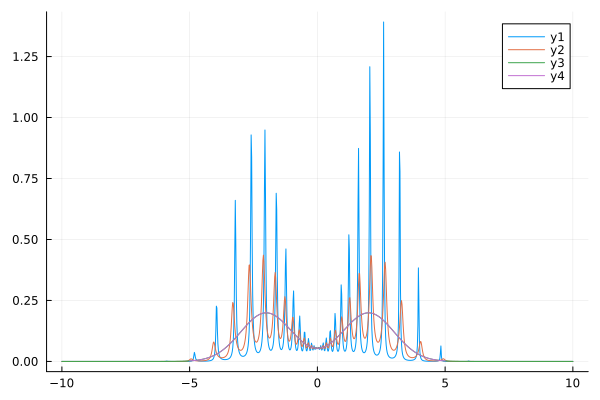

In [12]:
plot()
plot!(real.(wo_sol.reals.freq), imag.(wo_sol.reals.val)/pi)
plot!(Float64.(real.((wo_ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(wo_ham_nev_sol.val))/pi)
plot!(Float64.(real.((ham_nev_sol.nev_st.reals.freq))), Float64.(imag.(ham_nev_sol.val))/pi)
plot!(omegas, rho.(omegas))